In [1]:
%cd ..
%load_ext autoreload
%autoreload 2
import pickle

/Users/gimli/projects/igre


In [2]:
with open("data/processed/metacentrum/41-pickled.pkl", "rb") as src:
    data = pickle.load(src)

In [3]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ["x_shift", "y_shift", "rotation", "x_scale", "y_scale", 
              "distance", "sample", "repeat", 
              "x_est", "y_est", "rot_est", "x_sc_est", "y_sc_est"]

In [4]:
df["x_scale"] = 1
df["y_scale"] = 1

In [5]:
import numpy as np

In [6]:
df["shift_err"] = np.sqrt(
    np.power(df["x_shift"]-df["x_est"], 2) 
    + np.power(df["y_shift"]-df["y_est"], 2) 
)
df["rot_err"] = 34 * np.sqrt(
    np.power(df["rotation"]-df["rot_est"], 2)
)
df["scale_err"] = 400 * np.sqrt(
    np.power(df["x_scale"]-df["x_sc_est"], 2) + np.power(df["y_scale"]-df["y_sc_est"], 2)
)

In [7]:
import matplotlib.pyplot as plt

In [8]:
df["err"] = df["shift_err"] + df["rot_err"] + df["scale_err"]

In [9]:
correct = df[df["err"]<0.1][df["rot_err"]<0.1][df["scale_err"]<0.1].groupby(["sample", "distance"])["err"].agg(["count"]).unstack(fill_value=0).stack()
processed = df.groupby([ "sample", "distance"])["err"].agg(["count"])
to_show = correct.div(processed)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


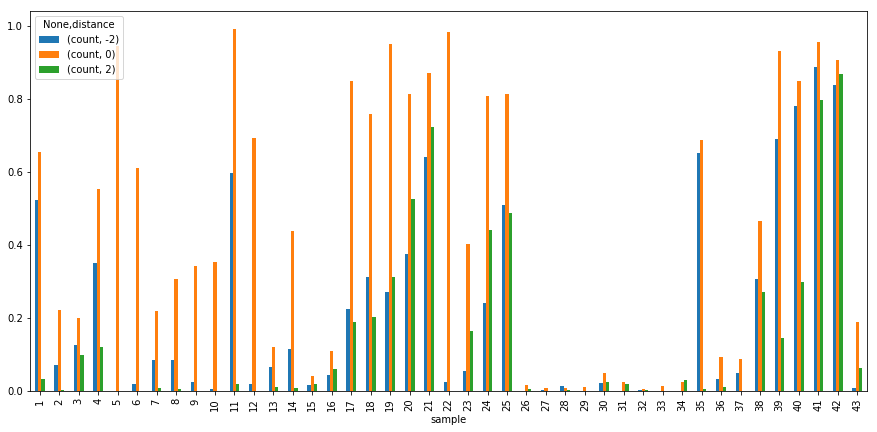

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
to_show.unstack().plot.bar(ax=ax)
plt.show()

In [11]:
# clustering podle realného displacementu
df["lt_displacement"] = np.sqrt(np.power(df["x_est"], 2) + np.power(df["y_est"], 2))
x_real = df["x_scale"] * np.cos(df["rotation"]/180*np.pi) * 400 - np.sin(df["rotation"]/180*np.pi) * 400 + df["x_shift"]
#x_est	y_est	rot_est	x_sc_est	y_sc_est
#x_est = df["x_sc_est"] * np.cos["rot_est"] * 400 - np.sin["rot_est"] * 400 + df["x_est"]
y_real = df["y_scale"] * np.cos(df["rotation"]/180*np.pi) * 400 + np.sin(df["rotation"]/180*np.pi) * 400 + df["y_shift"]
#y_est = df["y_sc_est"] * np.cos["rot_est"] * 400 + np.sin["rot_est"] * 400 + df["y_est"]
df["rb_displacement"] = np.sqrt(np.power(400-x_real, 2) + np.power(400-y_real, 2))

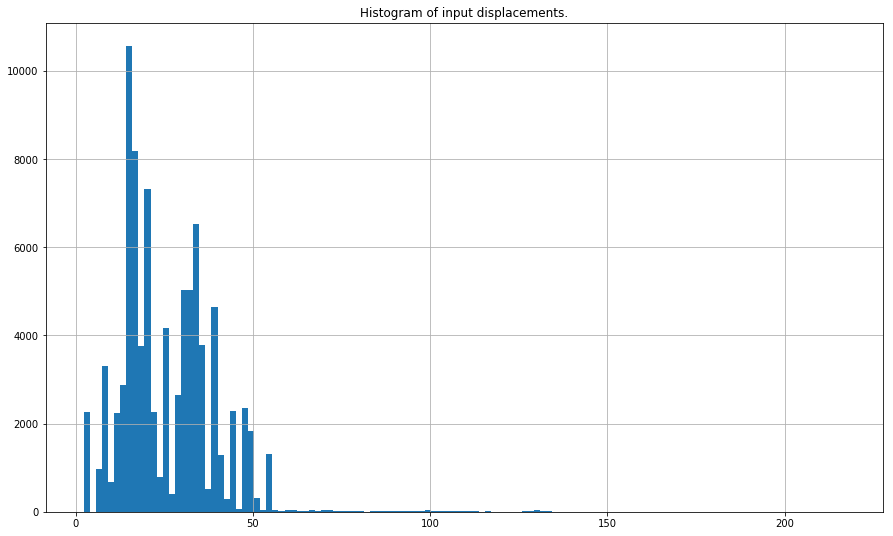

In [12]:
fig, ax = plt.subplots(figsize=(15,9))
df[["rb_displacement", "lt_displacement"]].max(axis=1).hist(ax=ax, bins=125)
plt.title("Histogram of input displacements.")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


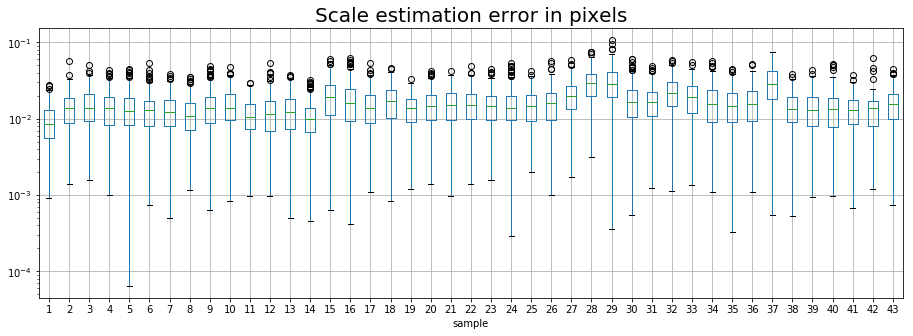

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
df[df[["rb_displacement", "lt_displacement"]].max(axis=1) < 20][df["distance"]==0].boxplot(by="sample", column="scale_err", ax=ax)
plt.suptitle("")
plt.title("""Scale estimation error in pixels""", fontsize=20)
plt.yscale("log")
plt.savefig("reports/figures/scale_err_41.pdf")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


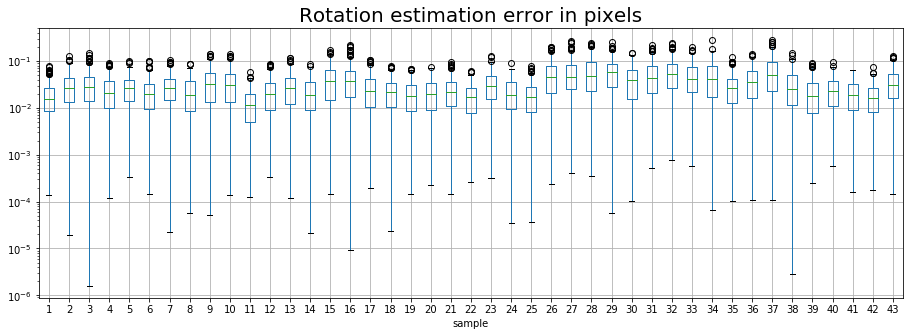

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
df[df[["rb_displacement", "lt_displacement"]].max(axis=1) < 20][df["distance"]==0].boxplot(by="sample", column="rot_err", ax=ax)
plt.suptitle("")
plt.title("""Rotation estimation error in pixels""", fontsize=20)
plt.yscale("log")
plt.savefig("reports/figures/rotation_err_41.pdf")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


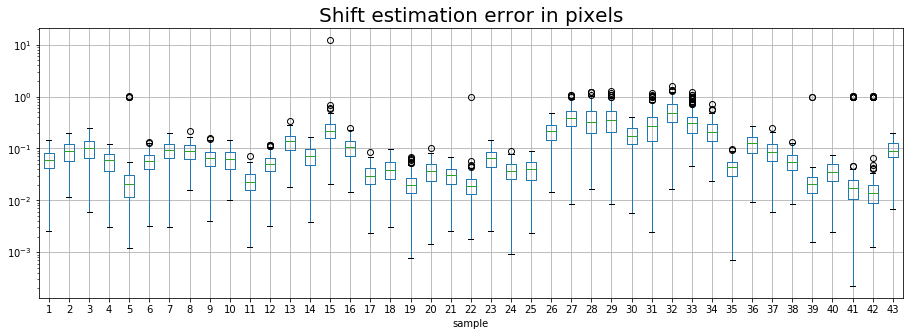

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
df[df[["rb_displacement", "lt_displacement"]].max(axis=1) < 20][df["distance"]==0].boxplot(by="sample", column="shift_err", ax=ax)
plt.suptitle("")
plt.title("""Shift estimation error in pixels""", fontsize=20)
plt.yscale("log")
plt.savefig("reports/figures/shift_err_41.pdf")
plt.show()

In [17]:
len(df[df["distance"]==0])/43

692.0